This work acts as a **personal practice space**. Works and improvements are **in progress**.
Should any fellow kagglers chance upon this page and would like to *provide your inputs*, please feel free to do so! :)

Current workbook is based on the Ames Housing Dataset which examines features of houses sold in Ames during the 2006–10 timeframe.
The objective is to;
1. Explore the features correlated to Sales Price
2. Determine predictor of sales price

# Import libraries

In [43]:
# Import required libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from scipy import stats
# pd.set_option('display.float_format', '{:.0f}'.format)

# Load Data

In [44]:
# Load raw data
data = pd.read_csv('../input/ames-housing-dataset/AmesHousing.csv')

# Replace spacing in column names with underscores
data.columns = data.columns.str.replace(' ', '_')

# Print the shape of the dataset
print("This dataset contains ", data.shape[0], " rows and ", data.shape[1], " columns")

# Set to display max column for entire dataset
pd.option_context('display.max_columns', 82)

This dataset contains  2930  rows and  82  columns


# Describe data

In [45]:
# View properties of dataset
print(data.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS_SubClass      2930 non-null   int64  
 3   MS_Zoning        2930 non-null   object 
 4   Lot_Frontage     2440 non-null   float64
 5   Lot_Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot_Shape        2930 non-null   object 
 9   Land_Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot_Config       2930 non-null   object 
 12  Land_Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition_1      2930 non-null   object 
 15  Condition_2      2930 non-null   object 
 16  Bldg_Type        2930 non-null   object 
 17  House_Style   

In [46]:
# View first 20 rows of dataset
print(data.head(20))

    Order        PID  MS_SubClass MS_Zoning  Lot_Frontage  Lot_Area Street  \
0       1  526301100           20        RL         141.0     31770   Pave   
1       2  526350040           20        RH          80.0     11622   Pave   
2       3  526351010           20        RL          81.0     14267   Pave   
3       4  526353030           20        RL          93.0     11160   Pave   
4       5  527105010           60        RL          74.0     13830   Pave   
5       6  527105030           60        RL          78.0      9978   Pave   
6       7  527127150          120        RL          41.0      4920   Pave   
7       8  527145080          120        RL          43.0      5005   Pave   
8       9  527146030          120        RL          39.0      5389   Pave   
9      10  527162130           60        RL          60.0      7500   Pave   
10     11  527163010           60        RL          75.0     10000   Pave   
11     12  527165230           20        RL           NaN      7

In [47]:
# Define variables which are numerical 
numeric_var = data.select_dtypes('number')

# Explore numerical variables
print(numeric_var.describe(include = 'all'))

            Order           PID  MS_SubClass  Lot_Frontage       Lot_Area  \
count  2930.00000  2.930000e+03  2930.000000   2440.000000    2930.000000   
mean   1465.50000  7.144645e+08    57.387372     69.224590   10147.921843   
std     845.96247  1.887308e+08    42.638025     23.365335    7880.017759   
min       1.00000  5.263011e+08    20.000000     21.000000    1300.000000   
25%     733.25000  5.284770e+08    20.000000     58.000000    7440.250000   
50%    1465.50000  5.354536e+08    50.000000     68.000000    9436.500000   
75%    2197.75000  9.071811e+08    70.000000     80.000000   11555.250000   
max    2930.00000  1.007100e+09   190.000000    313.000000  215245.000000   

       Overall_Qual  Overall_Cond   Year_Built  Year_Remod/Add  Mas_Vnr_Area  \
count   2930.000000   2930.000000  2930.000000     2930.000000   2907.000000   
mean       6.094881      5.563140  1971.356314     1984.266553    101.896801   
std        1.411026      1.111537    30.245361       20.860286    

In [48]:
# Define variables which are categorical
categorical_var = data.select_dtypes(exclude='number')

# Explore categorical variables
print(categorical_var.describe(include = 'all'))

       MS_Zoning Street Alley Lot_Shape Land_Contour Utilities Lot_Config  \
count       2930   2930   198      2930         2930      2930       2930   
unique         7      2     2         4            4         3          5   
top           RL   Pave  Grvl       Reg          Lvl    AllPub     Inside   
freq        2273   2918   120      1859         2633      2927       2140   

       Land_Slope Neighborhood Condition_1  ... Garage_Type Garage_Finish  \
count        2930         2930        2930  ...        2773          2771   
unique          3           28           9  ...           6             3   
top           Gtl        NAmes        Norm  ...      Attchd           Unf   
freq         2789          443        2522  ...        1731          1231   

       Garage_Qual Garage_Cond Paved_Drive Pool_QC  Fence Misc_Feature  \
count         2771        2771        2930      13    572          106   
unique           5           5           3       4      4            5   
top   

# Data Cleaning

In [49]:
# Drop "Order" and "PID" variables from the dataset
data = data.drop(["Order", "PID"], axis=1)

In [50]:
# Check for duplicated rows 
if data.duplicated().sum() == 0:
    print("No change in dataset as there are no duplicated row.")
else:
    # Keep row with latest built year
    data = data.sort_values('YearBuilt').drop_duplicates(keep='last')
    print("Number of duplicated rows removed: ", data.duplicated().sum())
    print("After removing duplicated rows, dataset contains ", data.shape[0], " rows and ", data.shape[1], " columns")

No change in dataset as there are no duplicated row.


In [51]:
# Find max and min values for numerical variables
max_values = data.max(numeric_only=True)
min_values = data.min(numeric_only=True)

# Combine the maximum and minimum values into one DataFrame
max_min = pd.concat([max_values, min_values], axis=1)
max_min.columns = ['Maximum', 'Minimum']

# Print the combined values
print(max_min.astype(int))

# Remove incorrect input of data, tentatively remove value.
data['Garage_Yr_Blt'] = data['Garage_Yr_Blt'].replace([2207], np.nan)

                 Maximum  Minimum
MS_SubClass          190       20
Lot_Frontage         313       21
Lot_Area          215245     1300
Overall_Qual          10        1
Overall_Cond           9        1
Year_Built          2010     1872
Year_Remod/Add      2010     1950
Mas_Vnr_Area        1600        0
BsmtFin_SF_1        5644        0
BsmtFin_SF_2        1526        0
Bsmt_Unf_SF         2336        0
Total_Bsmt_SF       6110        0
1st_Flr_SF          5095      334
2nd_Flr_SF          2065        0
Low_Qual_Fin_SF     1064        0
Gr_Liv_Area         5642      334
Bsmt_Full_Bath         3        0
Bsmt_Half_Bath         2        0
Full_Bath              4        0
Half_Bath              2        0
Bedroom_AbvGr          8        0
Kitchen_AbvGr          3        0
TotRms_AbvGrd         15        2
Fireplaces             4        0
Garage_Yr_Blt       2207     1895
Garage_Cars            5        0
Garage_Area         1488        0
Wood_Deck_SF        1424        0
Open_Porch_SF 

In [52]:
# Remove incorrect input of data, tentatively remove value.
data['Garage_Yr_Blt'] = data['Garage_Yr_Blt'].replace([2207], np.nan)

# Verify abnormal garage year build is being removed
np.sort(data["Garage_Yr_Blt"].unique())

array([1895., 1896., 1900., 1906., 1908., 1910., 1914., 1915., 1916.,
       1917., 1918., 1919., 1920., 1921., 1922., 1923., 1924., 1925.,
       1926., 1927., 1928., 1929., 1930., 1931., 1932., 1933., 1934.,
       1935., 1936., 1937., 1938., 1939., 1940., 1941., 1942., 1943.,
       1945., 1946., 1947., 1948., 1949., 1950., 1951., 1952., 1953.,
       1954., 1955., 1956., 1957., 1958., 1959., 1960., 1961., 1962.,
       1963., 1964., 1965., 1966., 1967., 1968., 1969., 1970., 1971.,
       1972., 1973., 1974., 1975., 1976., 1977., 1978., 1979., 1980.,
       1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988., 1989.,
       1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997., 1998.,
       1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006., 2007.,
       2008., 2009., 2010.,   nan])

# Handling Missing Value

In [53]:
# Find null values in each variable
null_values = data.isnull().sum()

# Calculate the percentage of null values rounded to 2 decimal places
null_percentages = (null_values / len(data) * 100).round(2)

# Find the data types for variables with null values
null_data_types = data.dtypes[null_values > 0]

# Combine the counts and percentages into a single DataFrame
null_summary = pd.concat([null_values, null_percentages, null_data_types], axis=1)
null_summary.columns = ['Null Count', '% Null', 'Data Type']

# Sort the DataFrame by the percentage of null values in descending order
null_summary = null_summary[null_summary['Null Count'] > 0].sort_values('% Null', ascending=False)

# Print the combined summary
print(null_summary.to_string())

# The high percentage of null most likely represent an absence of a feature

                Null Count  % Null Data Type
Pool_QC               2917   99.56    object
Misc_Feature          2824   96.38    object
Alley                 2732   93.24    object
Fence                 2358   80.48    object
Fireplace_Qu          1422   48.53    object
Lot_Frontage           490   16.72   float64
Garage_Yr_Blt          160    5.46   float64
Garage_Cond            159    5.43    object
Garage_Qual            159    5.43    object
Garage_Finish          159    5.43    object
Garage_Type            157    5.36    object
Bsmt_Exposure           83    2.83    object
BsmtFin_Type_2          81    2.76    object
BsmtFin_Type_1          80    2.73    object
Bsmt_Qual               80    2.73    object
Bsmt_Cond               80    2.73    object
Mas_Vnr_Area            23    0.78   float64
Mas_Vnr_Type            23    0.78    object
Bsmt_Half_Bath           2    0.07   float64
Bsmt_Full_Bath           2    0.07   float64
Total_Bsmt_SF            1    0.03   float64
Bsmt_Unf_S

In [54]:
# Group garage variables
garage_cols = ['Garage_Yr_Blt', 'Garage_Type', 'Garage_Finish', 'Garage_Cars', 
               'Garage_Area', 'Garage_Qual', 'Garage_Cond']

# Select rows where 'Garage_Type' is null
garage_type_null = data[data['Garage_Type'].isnull()][garage_cols]

# Display summary statistics for float columns
print("\033[1;96mSummary Statistics for Garage Variables (Float Type)\033[0m\n")
print(garage_type_null.select_dtypes(include=['float']).describe())

# Display summary statistics for object columns
print("\n\n\033[1;96mSummary Statistics for Garage Variables (Object Type)\033[0m\n")
print(garage_type_null.select_dtypes(include=['object']).describe())

# Fill null values in garage columns with 'None', when 'Garage_Type' is null
for col in garage_cols:
    if col != 'Garage_Type':
        if data[col].dtype == 'object':
            data.loc[data['Garage_Type'].isnull(), col] = data.loc[data['Garage_Type'].isnull(), col].fillna('None')
        else:
            data.loc[data['Garage_Type'].isnull(), col] = data.loc[data['Garage_Type'].isnull(), col].fillna(0)

# Fill null values in Garage_Type with 'None'
for col in garage_cols:    
    if col == 'Garage_Type':
        data.loc[data['Garage_Type'].isnull(), col] = 'None'

Summary Statistics for Garage Variables (Float Type)

       Garage_Yr_Blt  Garage_Cars  Garage_Area
count            0.0        157.0        157.0
mean             NaN          0.0          0.0
std              NaN          0.0          0.0
min              NaN          0.0          0.0
25%              NaN          0.0          0.0
50%              NaN          0.0          0.0
75%              NaN          0.0          0.0
max              NaN          0.0          0.0


Summary Statistics for Garage Variables (Object Type)

       Garage_Type Garage_Finish Garage_Qual Garage_Cond
count            0             0           0           0
unique           0             0           0           0
top            NaN           NaN         NaN         NaN
freq           NaN           NaN         NaN         NaN


In [55]:
# Group basement (bsmt) variables
bsmt_cols = ['Total_Bsmt_SF', 'Bsmt_Qual', 'Bsmt_Cond', 'Bsmt_Exposure', 
             'BsmtFin_Type_1', 'BsmtFin_SF_1', 'BsmtFin_Type_2', 'BsmtFin_SF_2', 
             'Bsmt_Unf_SF', 'Bsmt_Full_Bath', 'Bsmt_Half_Bath']

# Select rows where 'Total_Bsmt_SF' is null
total_bsmt_sf_null = data[data['Total_Bsmt_SF'].isnull()][bsmt_cols]
print("\033[1;92mNumber of null rows before updating: {}\033[0m".format(total_bsmt_sf_null.shape[0]))

# Display summary statistics for float columns when total basement area is null
print("\n\n\033[1;96mSummary Statistics for Basement Variables\033[0m\n")
print(total_bsmt_sf_null.describe())

# Fill null values in garage columns, of main dataframe, with 'None' or 0, when 'Garage_Type' is null
for col in bsmt_cols:
    if data[col].dtype == 'object':
        data.loc[data['Total_Bsmt_SF'].isnull(), col] = data.loc[data['Total_Bsmt_SF'].isnull(), col].fillna('None')
    else:
        data.loc[data['Total_Bsmt_SF'].isnull(), col] = data.loc[data['Total_Bsmt_SF'].isnull(), col].fillna(0)
            
# Verify if all basement variables have been updated no longer contain null
total_bsmt_sf_null_updated = data[data['Total_Bsmt_SF'].isnull()]
num_null_rows = total_bsmt_sf_null_updated.shape[0]
if num_null_rows > 0:
    print("\n\n\033[1;92mNumber of null rows after updating: {}\033[0m".format(num_null_rows))
else:
    print("\n\n\033[1;92mNumber of null rows after updating: 0\033[0m")

Number of null rows before updating: 1


Summary Statistics for Basement Variables

       Total_Bsmt_SF  BsmtFin_SF_1  BsmtFin_SF_2  Bsmt_Unf_SF  Bsmt_Full_Bath  \
count            0.0           0.0           0.0          0.0             0.0   
mean             NaN           NaN           NaN          NaN             NaN   
std              NaN           NaN           NaN          NaN             NaN   
min              NaN           NaN           NaN          NaN             NaN   
25%              NaN           NaN           NaN          NaN             NaN   
50%              NaN           NaN           NaN          NaN             NaN   
75%              NaN           NaN           NaN          NaN             NaN   
max              NaN           NaN           NaN          NaN             NaN   

       Bsmt_Half_Bath  
count             0.0  
mean              NaN  
std               NaN  
min               NaN  
25%               NaN  
50%               NaN  
75%               

In [56]:
# Select rows where 'Total_Bsmt_SF' equals 0.0
total_bsmt_sf_zero = data[data['Total_Bsmt_SF'] == 0.0][bsmt_cols]
print("\033[1;92mNumber of rows where total basmenet area is zero, before updating: {}\033[0m".format(total_bsmt_sf_zero.shape[0]))

# Display summary statistics for object columns where total basement area is 0
print("\n\n\033[1;96mSummary Statistics for Basement Variables\033[0m\n")
print(total_bsmt_sf_zero.describe())
print("There are variables containing nulls, hence resulting in count lesser then that of Total_Bsmt_SF.")

# Replace all 'bsmt_cols' with 'NA' when 'Total_Bsmt_SF' is 0.0
#data.loc[data['Total_Bsmt_SF'] == 0.0, bsmt_cols] = 'None'

for col in bsmt_cols:
    if data[col].dtype == 'object':
        data.loc[data['Total_Bsmt_SF'] == 0.0, col] = data.loc[data['Total_Bsmt_SF'] == 0.0, col].fillna('None')
        data.loc[data['Total_Bsmt_SF'].isnull(), col] = data.loc[data['Total_Bsmt_SF'].isnull(), col].fillna('None')
    else:
        data.loc[data['Total_Bsmt_SF'] == 0.0, col] = data.loc[data['Total_Bsmt_SF'] == 0.0, col].fillna(0)
        data.loc[data['Total_Bsmt_SF'].isnull(), col] = data.loc[data['Total_Bsmt_SF'].isnull(), col].fillna(0)
        
# Verify that all variables non null
total_bsmt_sf_zero_updated = data[data['Total_Bsmt_SF'] == 0.0][bsmt_cols]
print("\n\n\033[1;96mTotal count of all basement related variables when total basement area is 0.0\033[0m")
print(total_bsmt_sf_zero_updated.count())

Number of rows where total basmenet area is zero, before updating: 80


Summary Statistics for Basement Variables

       Total_Bsmt_SF  BsmtFin_SF_1  BsmtFin_SF_2  Bsmt_Unf_SF  Bsmt_Full_Bath  \
count           80.0          79.0          79.0         79.0            78.0   
mean             0.0           0.0           0.0          0.0             0.0   
std              0.0           0.0           0.0          0.0             0.0   
min              0.0           0.0           0.0          0.0             0.0   
25%              0.0           0.0           0.0          0.0             0.0   
50%              0.0           0.0           0.0          0.0             0.0   
75%              0.0           0.0           0.0          0.0             0.0   
max              0.0           0.0           0.0          0.0             0.0   

       Bsmt_Half_Bath  
count            78.0  
mean              0.0  
std               0.0  
min               0.0  
25%               0.0  
50%        

In [57]:
# Check for missing values in Pool_QC
pool = data[data["Pool_QC"].isnull()] 
pool_area = pool['Pool_Area'] 
print('When Pool QC is null, the value of Pool Area is ', np.unique(pool_area), '\nIndicating an absence of pool. Hence, it shall be replace with "None".')

# Replace all 'Pool_QC' with 'None' when 'Pool_Area' is null
data['Pool_QC'] = data['Pool_QC'].fillna("None")

When Pool QC is null, the value of Pool Area is  [0] 
Indicating an absence of pool. Hence, it shall be replace with "None".


In [58]:
# Check for missing values in Misc_Feature
misc = data[data["Misc_Feature"].isnull()]
miscval = misc['Misc_Val']
print('When there is no Misc Feature, the value of misc features (Misc Val) is', np.unique(miscval), '\nIndicating an absence of MiscFeature. Hence, it shall be replace with "None".')

# Replace all 'Misc_Feature' with 'None' when 'Misc_Val' is null
data['Misc_Feature'] = data['Misc_Feature'].fillna("None")

When there is no Misc Feature, the value of misc features (Misc Val) is [0] 
Indicating an absence of MiscFeature. Hence, it shall be replace with "None".


In [59]:
# Check for missing values in Alley
alley = data[data["Alley"].isnull()]
print('When Alley is null, alley is absence.')

# Replace all missing 'Alley' values with 'None' to represent absence
data['Alley'] = data['Alley'].fillna("None")

When Alley is null, alley is absence.


In [60]:
# Check for missing values in Fence
Fence = data[data["Fence"].isnull()]
print('When Fence is null, Fence is absence.')

# Replace all missing 'Fence' values with 'None' to represent absence
data['Fence'] = data['Fence'].fillna("None")

When Fence is null, Fence is absence.


In [61]:
# Check for missing values in Fireplace_Qu
fireplacequ = data[data["Fireplace_Qu"].isnull()]
fireplace = fireplacequ['Fireplaces']

# Replace all 'Fireplace_Qu' with 'None' when 'Fireplaces' is absence
data['Fireplace_Qu'] = data['Fireplace_Qu'].fillna("None")
print('When Fireplace Qu is null,the value of fireplace', np.unique(fireplace), '\nindicating an absence of fireplace. Hence, Fireplace Qu shall be replace with None.')

When Fireplace Qu is null,the value of fireplace [0] 
indicating an absence of fireplace. Hence, Fireplace Qu shall be replace with None.


In [62]:
# Check for missing values in Lot_Frontage
LotFrontage = data[data["Lot_Frontage"].isnull()]

# Find non-null values of 'Lot_Frontage'
non_null_lot_frontage = data[data['Lot_Frontage'].notnull()]

# Calculate the global median of 'Lot_Frontage'
global_mean = data['Lot_Frontage'].mean()

# Group by ['Neighborhood', 'Lot_Shape', 'Lot_Config'] and calculate mean of 'Lot_Frontage'
grouped_data = non_null_lot_frontage.groupby(['Neighborhood', 'Lot_Shape', 'Lot_Config'])
mean_lot_frontage_grouped = grouped_data['Lot_Frontage'].mean()

# Replace null values of 'Lot_Frontage' using group means
data['Lot_Frontage'] = data.apply(lambda row: mean_lot_frontage_grouped.get((row['Neighborhood'], row['Lot_Shape'], row['Lot_Config']), global_mean)
                                  if pd.isnull(row['Lot_Frontage'])
                                  else row['Lot_Frontage'], axis=1).round(0)

# Replace null values of 'Lot_Frontage' with mean of entire dataset if any group has all null values
if data['Lot_Frontage'].isnull().any():
    data['Lot_Frontage'].fillna(data['Lot_Frontage'].mean().round(0), inplace=True)

In [63]:
# Select rows where 'Garage_Type' is null
garage_type_null = data[data['Garage_Type'].isnull()][garage_cols]

# Display summary statistics for float columns
print("\033[1;96mSummary Statistics for Garage Variables (Float Type)\033[0m\n")
print(garage_type_null.select_dtypes(include=['float']).describe())

# Display summary statistics for object columns
print("\n\n\033[1;96mSummary Statistics for Garage Variables (Object Type)\033[0m\n")
print(garage_type_null.select_dtypes(include=['object']).describe())

# Fill null values in garage columns with 'None', when 'Garage_Type' is null
for col in garage_cols:
    if col != 'Garage_Type':
        if data[col].dtype == 'object':
            data.loc[data['Garage_Type'].isnull(), col] = data.loc[data['Garage_Type'].isnull(), col].fillna('None')
        else:
            data.loc[data['Garage_Type'].isnull(), col] = data.loc[data['Garage_Type'].isnull(), col].fillna(0)
    elif col == 'Garage_Type':
        data.loc[data['Garage_Type'].isnull(), col] = 'None'

Summary Statistics for Garage Variables (Float Type)

       Garage_Yr_Blt  Garage_Cars  Garage_Area
count            0.0          0.0          0.0
mean             NaN          NaN          NaN
std              NaN          NaN          NaN
min              NaN          NaN          NaN
25%              NaN          NaN          NaN
50%              NaN          NaN          NaN
75%              NaN          NaN          NaN
max              NaN          NaN          NaN


Summary Statistics for Garage Variables (Object Type)

       Garage_Type Garage_Finish Garage_Qual Garage_Cond
count            0             0           0           0
unique           0             0           0           0
top            NaN           NaN         NaN         NaN
freq           NaN           NaN         NaN         NaN


In [64]:
# Check for missing values in Garage_Cond
garagecondi = data[data['Garage_Cond'].isnull()]
garagetype = garagecondi['Garage_Type']
print('Types of Garage Type when Garage Condi is empty',np.unique(list(garagetype)))
      
# Locate Garage Details rows with Garage_Type = 'Detchd'
print("\n\n\033[1;96mWhen Garage Type = 'Detchd'\033[0m")
print(data[data['Garage_Cond'].isnull()][garage_cols])

# Replace the value in row 2236's Garage_Type and Garage_Cond column with 'None' or 0
# Since all Garage related information are not available, it is likely an error in Garage_Type.
for col in garage_cols:
    if data[col].dtype == 'object':
        data.at[2236, col] = 'None'
    elif col == 'Garage_Yr_Blt':
        data.at[2236, col] = data.at[2236, 'Year_Built']
    else:
        data.at[2236, col] = 0

# To replace row 1356 in the subsequent steps
print("\n\n\033[1;96mMissing data to be replaced:\033[0m")
print(data[data['Garage_Cond'].isnull()][garage_cols])

Types of Garage Type when Garage Condi is empty ['Detchd']


When Garage Type = 'Detchd'
      Garage_Yr_Blt Garage_Type Garage_Finish  Garage_Cars  Garage_Area  \
1356            NaN      Detchd           NaN          1.0        360.0   
2236            NaN      Detchd           NaN          NaN          NaN   

     Garage_Qual Garage_Cond  
1356         NaN         NaN  
2236         NaN         NaN  


Missing data to be replaced:
      Garage_Yr_Blt Garage_Type Garage_Finish  Garage_Cars  Garage_Area  \
1356            NaN      Detchd           NaN          1.0        360.0   

     Garage_Qual Garage_Cond  
1356         NaN         NaN  


In [65]:
# Check for missing values in Garage_Yr_Blt
garageyr = data[data['Garage_Yr_Blt'].isnull()]
garagetype = garageyr['Garage_Type']
print('Types of Garage Type when Garage Year Built is empty',np.unique(list(garagetype)))

# Locate Garage Details rows with Garage_Type = 'Attchd' or Detchd'
# print(data[(data['Garage_Yr_Blt'].isnull()) & (data['Garage_Type'].isin(['Attchd', 'Detchd']))][columns_to_print])

# Count occurrences where Garage_Yr_Blt is equal to Year_Built
match_year = data[data['Garage_Yr_Blt'] == data['Year_Built']].shape[0]

# Calculate the percentage
match_percentage = (match_year / data.shape[0]) * 100

# Print the result
print("Percentage of occurrences where Garage_Yr_Blt is equal to Year_Built: {:.2f}%".format(match_percentage))

# to replace as NA
data['Garage_Yr_Blt'] = data['Garage_Yr_Blt'].fillna(data['Year_Built'])

Types of Garage Type when Garage Year Built is empty ['Attchd' 'Detchd']
Percentage of occurrences where Garage_Yr_Blt is equal to Year_Built: 76.04%


In [66]:
# Print initial values for row 1356
print("\033[1;96mBefore replacing null value in row 1356:\033[0m")
print(data.loc[1356, garage_cols])

# Filter and group the data based on neighborhood and year_built
neighborhood = data.loc[1356, 'Neighborhood']
garage_yr_blt = data.loc[1356, 'Garage_Yr_Blt']
group_data = data[(data['Neighborhood'] == neighborhood) & (data['Garage_Yr_Blt'] == garage_yr_blt)]

# Calculate mode of missing variables, groupbed by neighborhood and garage year build
mode_garage_qual = group_data['Garage_Qual'].mode()
mode_garage_cond = group_data['Garage_Cond'].mode()
mode_garage_finish = group_data['Garage_Finish'].mode()

# Assign the mode value to the specific variables
if not mode_garage_qual.empty:
    data.at[1356, 'Garage_Qual'] = mode_garage_qual.values[0]

if not mode_garage_cond.empty:
    data.at[1356, 'Garage_Cond'] = mode_garage_cond.values[0]

if not mode_garage_finish.empty:
    data.at[1356, 'Garage_Finish'] = mode_garage_finish.values[0]

# Print the updated values
print("\n\n\033[1;96mAfter replacing null value in row 1356:\033[0m")
print(data.loc[1356, garage_cols])



Before replacing null value in row 1356:
Garage_Yr_Blt    1910.0
Garage_Type      Detchd
Garage_Finish       NaN
Garage_Cars         1.0
Garage_Area       360.0
Garage_Qual         NaN
Garage_Cond         NaN
Name: 1356, dtype: object


After replacing null value in row 1356:
Garage_Yr_Blt    1910.0
Garage_Type      Detchd
Garage_Finish       Unf
Garage_Cars         1.0
Garage_Area       360.0
Garage_Qual          Fa
Garage_Cond          Po
Name: 1356, dtype: object


In [67]:
# Print Mas_Vnr_Type when Mas_Vnr_Area is null
null_mas_vnr_type = data[data['Mas_Vnr_Area'].isnull()]['Mas_Vnr_Type']
print('Unique Mas_Vnr_Type values: ', np.unique(null_mas_vnr_type))

# Replace Mas_Vnr_Type as 'None' when Mas_Vnr_Area is null
data['Mas_Vnr_Type'] = data['Mas_Vnr_Type'].fillna('None')

# Replacing null for Mas_Vnr_Area as 0 as it represent absence 
data['Mas_Vnr_Area'] = data['Mas_Vnr_Area'].fillna('0')

Unique Mas_Vnr_Type values:  [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan]


In [68]:
# Find mode of Electrical
mode_value = data['Electrical'].mode()[0]

# Replace all null 'Electrical' with mode
data['Electrical'] = data['Electrical'].fillna(mode_value)

# Verify that all null value had been replaced
print("\033[1;96mElectical Type after replacing null value\033[0m")
print(data['Electrical'].unique())

Electical Type after replacing null value
['SBrkr' 'FuseA' 'FuseF' 'FuseP' 'Mix']


In [69]:
# Check for missing values in Bsmt_Exposure 
print(data[data['Bsmt_Exposure'].isnull()][bsmt_cols])

# Find mode of Bsmt_Exposure
mode_value = data['Bsmt_Exposure'].mode()[0]

# Replace all null 'Bsmt_Exposure' with mode
data['Bsmt_Exposure'] = data['Bsmt_Exposure'].fillna(mode_value)

# Verify that all null value had been replaced
print("\n\n\033[1;96mBasement exposure after replacing null value\033[0m")
print(data['Bsmt_Exposure'].unique())

      Total_Bsmt_SF Bsmt_Qual Bsmt_Cond Bsmt_Exposure BsmtFin_Type_1  \
66           1595.0        Gd        TA           NaN            Unf   
1796          725.0        Gd        TA           NaN            Unf   
2779          936.0        Gd        TA           NaN            Unf   

      BsmtFin_SF_1 BsmtFin_Type_2  BsmtFin_SF_2  Bsmt_Unf_SF  Bsmt_Full_Bath  \
66             0.0            Unf           0.0       1595.0             0.0   
1796           0.0            Unf           0.0        725.0             0.0   
2779           0.0            Unf           0.0        936.0             0.0   

      Bsmt_Half_Bath  
66               0.0  
1796             0.0  
2779             0.0  


Basement exposure after replacing null value
['Gd' 'No' 'Mn' 'Av' 'None']


In [70]:
# Check for missing values in BsmtFin_Type_2 
print("\033[1;96mBMissing values in BsmtFin_Type\033[0m")
print(data[data['BsmtFin_Type_2'].isnull()][bsmt_cols])

# Filter and group the data based on neighborhood and year_built
neighborhood = data.loc[444, 'Neighborhood']
year_built = data.loc[444, 'Year_Built']
group_data = data[(data['Neighborhood'] == neighborhood) & (data['Year_Built'] == year_built)]

# Calculate mode of missing variables, groupbed by neighborhood and garage year build
mode_bsmtfin_type_2 = group_data['BsmtFin_Type_2'].mode()

# Assign the mode value to the specific variables
data.loc[444, 'BsmtFin_Type_2'] = mode_bsmtfin_type_2[0]

# Print the updated values
print("\n\n\033[1;96mBRow 444 after updating\033[0m")
print(data.loc[444, bsmt_cols])

BMissing values in BsmtFin_Type
     Total_Bsmt_SF Bsmt_Qual Bsmt_Cond Bsmt_Exposure BsmtFin_Type_1  \
444         3206.0        Gd        TA            No            GLQ   

     BsmtFin_SF_1 BsmtFin_Type_2  BsmtFin_SF_2  Bsmt_Unf_SF  Bsmt_Full_Bath  \
444        1124.0            NaN         479.0       1603.0             1.0   

     Bsmt_Half_Bath  
444             0.0  


BRow 444 after updating
Total_Bsmt_SF     3206.0
Bsmt_Qual             Gd
Bsmt_Cond             TA
Bsmt_Exposure         No
BsmtFin_Type_1       GLQ
BsmtFin_SF_1      1124.0
BsmtFin_Type_2       Unf
BsmtFin_SF_2       479.0
Bsmt_Unf_SF       1603.0
Bsmt_Full_Bath       1.0
Bsmt_Half_Bath       0.0
Name: 444, dtype: object


In [71]:
# Ensure all null values had been removed
null_values = data.isnull().sum()
print("Remaining null values in dataset: ", null_values.sum())

Remaining null values in dataset:  0


# Create new variable

In [72]:
# Create the "Sold_House_Age" variable
data["Sold_House_Age"] = data["Yr_Sold"] - data["Year_Built"]

# Label encoding of variable
#encode = {"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
          "Street" : {"Grvl" : 1, "Pave" : 2},
          "Alley" : {"None" : 0, "Grvl" : 1, "Pave" : 2},
          "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
          "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4},
          "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
          "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
          "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
          "BsmtQual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
          "BsmtCond" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
          "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
          "BsmtFinType1" : {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4,
                            "ALQ" : 5, "GLQ" : 6},
          "BsmtFinType2" : {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                            "ALQ" : 5, "GLQ" : 6},
          "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
          "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
          "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                          "Min2" : 6, "Min1" : 7, "Typ" : 8},
          "FireplaceQu" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
          "GarageQual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
          "GarageCond" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
          "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
          "PoolQC" : {"None" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
          "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                      7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                      }
          

#data_final = data.replace(encode)

data_final = data

In [73]:
data_final = data

# Label encoding to categorical variable

In [74]:
# Define the categorical variables to encode
#categorical_var = data.select_dtypes(exclude='number')
#cat_var = categorical_var.nunique() 
#cat_var_list = cat_var.index.tolist()

# Initialize the LabelEncoder
#label_encoder = LabelEncoder()

# Apply label encoding to each categorical variable
#for var in cat_var_list:
#    data[var] = data[var].astype(str)
#    data[var] = label_encoder.fit_transform(data[var])

# Print the encoded DataFrame
#print(data[cat_var_list])

# EDA and Visualization on Numerical Variables

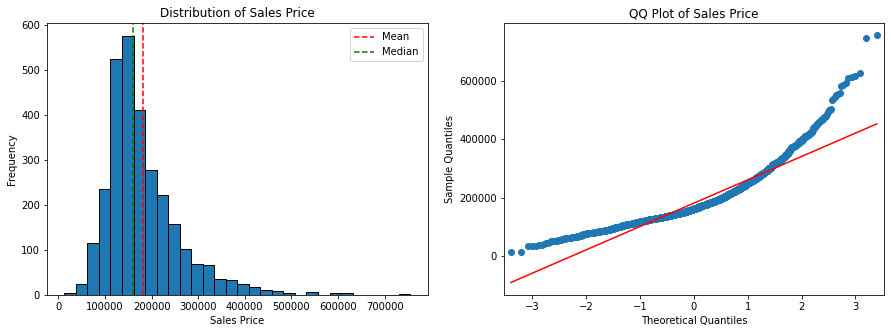

In [75]:
import statsmodels.api as sm
import scipy.stats as stats

# Extract the "Sale Price" column from the data
sales_price = data_final["SalePrice"]

# Plot the distribution of "Sales Price"
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Histogram
ax1.hist(sales_price, bins=30, edgecolor='black')
ax1.set_xlabel("Sales Price")
ax1.set_ylabel("Frequency")
ax1.set_title("Distribution of Sales Price")

# Add a vertical line representing the mean or the median
mean = sales_price.mean()
median = sales_price.median()
ax1.axvline(mean, color='red', linestyle='--', label='Mean')
ax1.axvline(median, color='green', linestyle='--', label='Median')
ax1.legend()

# QQ plot
sm.qqplot(sales_price, dist=stats.norm, line='s', ax=ax2)
ax2.set_title("QQ Plot of Sales Price")

# Plot graph
plt.show()

In [76]:
# Calculate the Skewness, Kurtosis and Shapiro Test of SalePrice
saleprice_skewness = stats.skew(data_final['SalePrice'])
saleprice_kurtosis = stats.kurtosis(data_final['SalePrice'])
shapiro_test_stat, shapiro_test_pvalue = stats.shapiro(data_final['SalePrice'])

# Print results
print("Skewness: {:.2f}" .format(saleprice_skewness))
print("Kurtosis: {:.2f}" .format(saleprice_kurtosis))
print("Shapiro Test Statistic: {:.2f}" .format(shapiro_test_stat))
print("Shapiro Test p-value: {:.2f}" .format(shapiro_test_pvalue))

Skewness: 1.74
Kurtosis: 5.11
Shapiro Test Statistic: 0.88
Shapiro Test p-value: 0.00


The histogram for Distribution of Sales Price reveals it to be right-skewed which can also be intepreted from the median being lower than the mean. The QQ plot also reflects a non-linear pattern, suggesting that the tails of the distribution had extement values (outliers) and are positively skewed, as compared to a normal distribution. Furthermore, the calculated skewness value of 1.74 and kurtosis of 5.11 further supports the interpretation of a right-skewed distribution. (The acceptable range for skewness are between -0.5 and 0.5 and between -2 and 2 for kurtosis.)

The right-skewed distribution represents that the majority of the properties are of a lower sale prices, while there are a few housing properties with significantly higher sale prices. This is evident from the longer right tail in the plot. The presence of outliers on the higher end of sales prices shall be evaluated as there will be a substantial impact on the increased mean.

Although the results of the Shapiro-Wilk test statistic of 0.88 and a p-value of 0.00 provides a strong evidence to reject the null hypothesis of a normal distribution, it is important to consider that the Shapiro-Wilk test assumes that the dataset does not have significant skewness or kurtosis and does not have outliers. Therefore, we shall hold on to the Shapiro-Wilk test until determining the presence of outliers.

In order to gain a comprehensive understanding of the Sales Price distribution, it is recommended to consider additional exploratory data analysis techniques. These may exploring the correlation between the features and sales price.

Number of outliers: 137


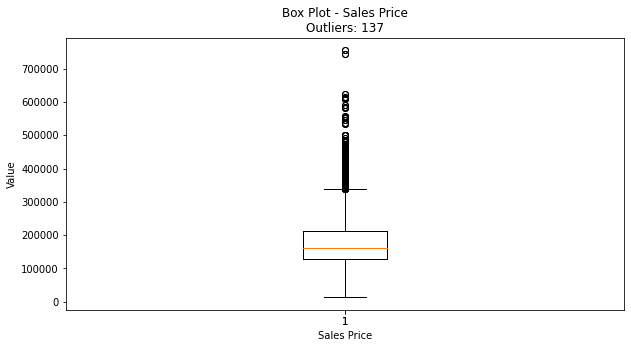

In [77]:
# Create a box plot to visualize the distribution and identify outliers
fig = plt.figure(figsize=(10, 5))
box_plot = plt.boxplot(sales_price)
outliers = box_plot["fliers"][0].get_ydata()
outlier_count = len(outliers)

# Print the number of outliers
print("Number of outliers:", outlier_count)

# Display the box plot with the outlier count
plt.boxplot(sales_price)
plt.xlabel("Sales Price")
plt.ylabel("Value")
plt.title("Box Plot - Sales Price\nOutliers: {}".format(outlier_count))
plt.show()

In [78]:
# Calculate the IQR
Q1 = sales_price.quantile(0.25)
Q3 = sales_price.quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
upper_bound = Q3 + (1.5 * IQR)
lower_bound = Q1 - (1.5 * IQR)
print('IQR: ', IQR, '\nUpper Bound: ', upper_bound, '\nLower Bound: ', lower_bound, '\n')

# Find the outliers
outliers = sales_price[(sales_price < lower_bound) | (sales_price > upper_bound)]

# Print the outliers
print("Outliers in SalePrice:")
print(outliers)

IQR:  84000.0 
Upper Bound:  339500.0 
Lower Bound:  3500.0 

Outliers in SalePrice:
15      538000
17      394432
36      376162
38      395192
44      611657
         ...  
2666    475000
2737    415000
2883    375000
2901    369900
2902    359900
Name: SalePrice, Length: 137, dtype: int64


In [79]:
# Convert outliers to a DataFrame
outliers_df = pd.DataFrame(outliers, columns=data_final.columns)

# Get the indices of the outliers
outlier_indices = outliers_df.index

# Retrieve the corresponding neighborhoods and sales prices of the outliers
outliers_data = data_final.loc[outlier_indices, ['Neighborhood', 'SalePrice']]

# Group the outliers by neighborhood and calculate the count and mean sales price
outliers_grouped = outliers_data.groupby('Neighborhood')['SalePrice'].agg(['count', 'mean'])

# Print the grouped outliers with count and mean sales price
print("Outliers grouped by neighborhood with count and mean sales price:")
print(outliers_grouped)

# Calculate the percentage of outliers
outlier_percentage = (len(outlier_indices) / len(data_final)) * 100

# Print the percentage of outliers
print("\nPercentage of outliers in the dataset: {:.2f}%".format(outlier_percentage))


Outliers grouped by neighborhood with count and mean sales price:
              count           mean
Neighborhood                      
CollgCr           5  407775.800000
Crawfor           5  376520.000000
Edwards           1  415000.000000
Gilbert           1  377500.000000
NAmes             1  345000.000000
NoRidge          21  437595.238095
NridgHt          62  420424.419355
OldTown           1  475000.000000
Somerst           8  388922.750000
StoneBr          22  438790.409091
Timber            8  385037.500000
Veenker           2  379000.000000

Percentage of outliers in the dataset: 4.68%


The IQR is calculated as 84,000, with upper bound of 339,500 and lower bound of 3,500. Any Sales Price falling above the upper bound and below the lower bound are considered as potential outliers.

There are 137 (4.68%) potential outliers which are consistent with the information obtained from the previous box plot.

Nonetheless, the sales of Ames Housing were sold over the period of 2006 to 2010 and had multiple variables which would affect the range of sales. Working on domain knowledge on housing sales prices, the following are variables which shall be explored further to determine if it is a predictor of sales price.
1. Overall Quality
2. Sold House Age (Direct relation to Year Build)
3. Living Area
    * First Floor Living Area
    * Ground Living Area
    * Total Basement Area
4. Garage Cars (Garage Area will determine how many cars can be parked in the garage)
5. Full Bath

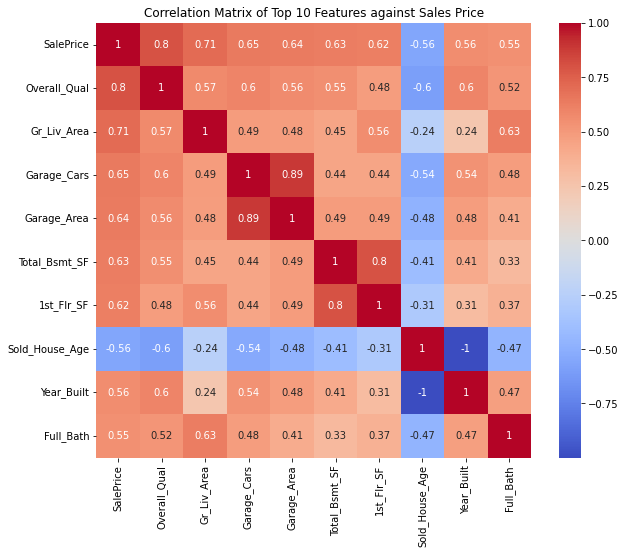

In [80]:
# Identify the top 10 features with highest absolute correlation with Sales Price
correlation_matrix = data_final.corr().abs()
top_10_features = correlation_matrix.nlargest(10, 'SalePrice')['SalePrice'].index

# Create a subset of data with Sales Price and top 10 features
subset_data = data_final[top_10_features]

# Calculate the correlation matrix
corr_matrix = subset_data.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Top 10 Features against Sales Price')
plt.show()

**1. Overall Quality**

Upon analyzing the data, it is evident that the overall quality of the house has a strong positive correlation of 0.8 with the sales price. This is supported by the bar chart where the sales price increases with an increase in overall quality. Interpreting from the box plot, when the house is of a low overall quality, the sales price range are at the lower range and have a narrower range of sales prices, indicating less variablity. As the overall quality increases, it widens the sales price range and outliers are perceived. These outliers represent houses with higher sales prices compared to the majority of houses within their respective overall quality categories. This suggests that there are certain exceptional houses with higher sales prices despite having the same overall quality as other houses. These exceptional houses may be influenced by various features, contributing to their higher market value.

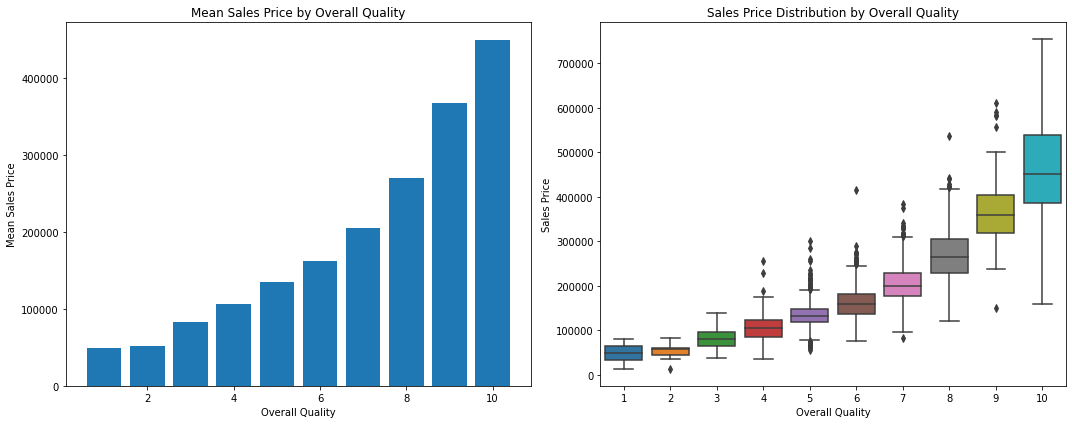

Correlation between Sales Price and Overall Quality: 0.80


In [81]:
# Calculate the mean sales price by Overall_Qual
mean_sales_price_by_overall_qual = data_final.groupby("Overall_Qual")["SalePrice"].mean().reset_index().round(2)

# Sort the data by Overall_Qual in ascending order
mean_sales_price_by_overall_qual = mean_sales_price_by_overall_qual.sort_values("Overall_Qual")

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot the mean sales price by Overall_Qual
ax1.bar(mean_sales_price_by_overall_qual["Overall_Qual"], mean_sales_price_by_overall_qual["SalePrice"])
ax1.set_xlabel("Overall Quality")
ax1.set_ylabel("Mean Sales Price")
ax1.set_title("Mean Sales Price by Overall Quality")

# Create a box plot of Sales Price by Overall_Qual
sns.boxplot(x=data_final["Overall_Qual"], y=data_final["SalePrice"], ax=ax2)
ax2.set_xlabel("Overall Quality")
ax2.set_ylabel("Sales Price")
ax2.set_title("Sales Price Distribution by Overall Quality")

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plots
plt.show()

# Calculate the correlation between sales price and Overall_Qual
correlation = data_final['SalePrice'].corr(data_final['Overall_Qual'])

# Print the correlation
print("Correlation between Sales Price and Overall Quality: {:.2f}".format(correlation))



**2. Sold House Age**

Next, the sold house age exhibits a negative correlation of 0.56, implyong that the mean sales prices decreases with an increase in the age of the house at the point of sale. Analyzing the box plot, it is observed that the difference in mean sales prices between different housing age groups is more pronounced for houses that are relatively young. As the age of the house increases, the difference in mean sales prices becomes less fluctuating, indicating a relatively stable pricing pattern for houses older than 30 years. 

Nonetheless, the higher number of outliers in the box plot reveals that there might be other features which are influential, beyond the age of the house on sales prices.

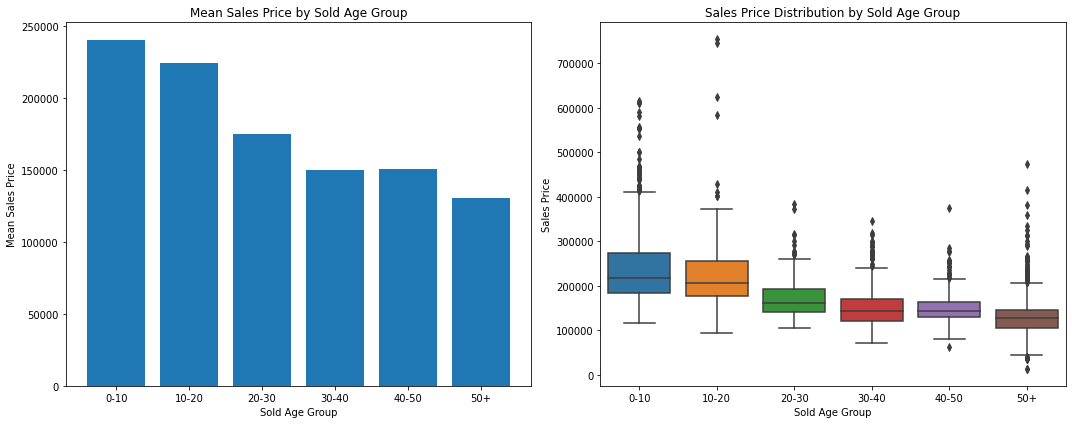

Correlation between Sales Price and Sold House Age: -0.56


In [82]:
# Define the bin edges for grouping sold age
bin_edges = [0, 10, 20, 30, 40, 50, float('inf')]
bin_labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50+']

# Create a new column "Sold_House_Age_Group" with the corresponding age bin labels
data_final['Sold_House_Age_Group'] = pd.cut(data_final['Sold_House_Age'], bins=bin_edges, labels=bin_labels)

# Calculate the mean sales price by Sold_House_Age group
mean_sales_price_by_soldage_group = data_final.groupby("Sold_House_Age_Group")["SalePrice"].mean().reset_index().round(2)

# Sort the data by Sold_House_Age in ascending order
mean_sales_price_by_soldage_group = mean_sales_price_by_soldage_group.sort_values("Sold_House_Age_Group")

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot the mean sales price by Sold_House_Age group
ax1.bar(mean_sales_price_by_soldage_group["Sold_House_Age_Group"], mean_sales_price_by_soldage_group["SalePrice"])
ax1.set_xlabel("Sold Age Group")
ax1.set_ylabel("Mean Sales Price")
ax1.set_title("Mean Sales Price by Sold Age Group")

# Create a box plot of Sales Price by Sold Age Group
sns.boxplot(x=data_final["Sold_House_Age_Group"], y=data_final["SalePrice"], ax=ax2)
ax2.set_xlabel("Sold Age Group")
ax2.set_ylabel("Sales Price")
ax2.set_title("Sales Price Distribution by Sold Age Group")

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plots
plt.show()

# Calculate the correlation between sales price and Sold_House_Age
correlation = data_final['SalePrice'].corr(data_final['Sold_House_Age'])

# Print the correlation
print("Correlation between Sales Price and Sold House Age: {:.2f}".format(correlation))

In [83]:
#max_total_bsmt_sf = data_final['Total_Living_Area'].min()
#print("Maximum value of Total_Bsmt_SF:", max_total_bsmt_sf)

#max_total_bsmt_sf = data_final['Total_Living_Area'].max()
#print("Maximum value of Total_Bsmt_SF:", max_total_bsmt_sf)

Correlation between Sales Price and Total Living Area: 0.79


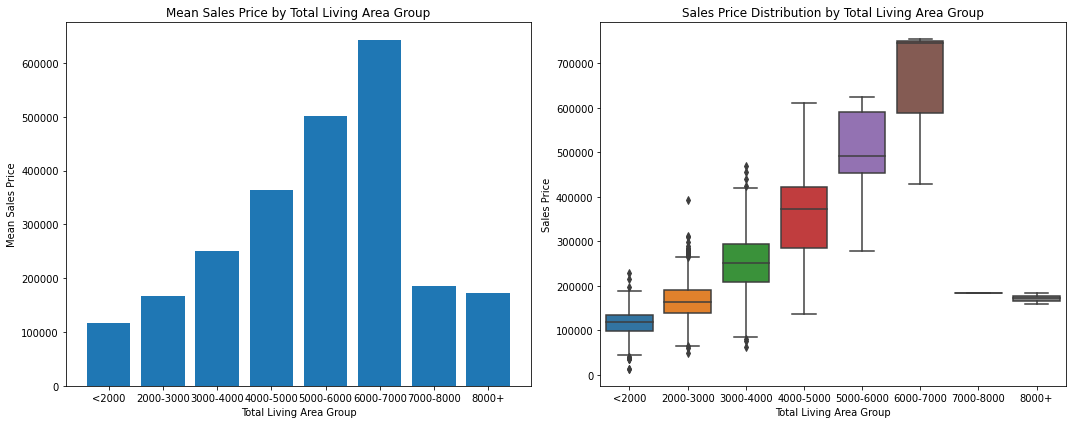

In [84]:
# Calculate the total living area
data_final['Total_Living_Area'] = data_final['Gr_Liv_Area'] + data_final['Total_Bsmt_SF']

# Define the bin edges for grouping Total_Living_Area
bin_edges = [data_final['Total_Living_Area'].min()-1, 2000, 3000, 4000, 5000, 6000, 7000, 8000, float('inf')]
bin_labels = ['<2000', '2000-3000', '3000-4000', '4000-5000', '5000-6000', '6000-7000', '7000-8000','8000+']

# Create a new column "Total_Living_Area_Group" with the corresponding area bin labels
data_final['Total_Living_Area_Group'] = pd.cut(data_final['Total_Living_Area'], bins=bin_edges, labels=bin_labels)

# Calculate the mean sales price by Total_Living_Area group
mean_sales_price_by_total_living_area_group = data_final.groupby("Total_Living_Area_Group")["SalePrice"].mean().reset_index().round(2)

# Sort the data by Total_Living_Area in ascending order
mean_sales_price_by_total_living_area_group = mean_sales_price_by_total_living_area_group.sort_values("Total_Living_Area_Group")

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot the mean sales price by Total_Living_Area group
ax1.bar(mean_sales_price_by_total_living_area_group["Total_Living_Area_Group"], mean_sales_price_by_total_living_area_group["SalePrice"])
ax1.set_xlabel("Total Living Area Group")
ax1.set_ylabel("Mean Sales Price")
ax1.set_title("Mean Sales Price by Total Living Area Group")

# Create a box plot of Sales Price by Total Living Area Group
sns.boxplot(x=data_final["Total_Living_Area_Group"], y=data_final["SalePrice"], ax=ax2)
ax2.set_xlabel("Total Living Area Group")
ax2.set_ylabel("Sales Price")
ax2.set_title("Sales Price Distribution by Total Living Area Group")

# Adjust the spacing between subplots
fig.tight_layout()

# Calculate the correlation between sales price and Total_Living_Area
correlation = data_final['SalePrice'].corr(data_final['Total_Living_Area'])

# Print the correlation
print("Correlation between Sales Price and Total Living Area: {:.2f}".format(correlation))

# Show the plots
plt.show()


Correlation between Sales Price and 1st_Flr_SF: 0.62


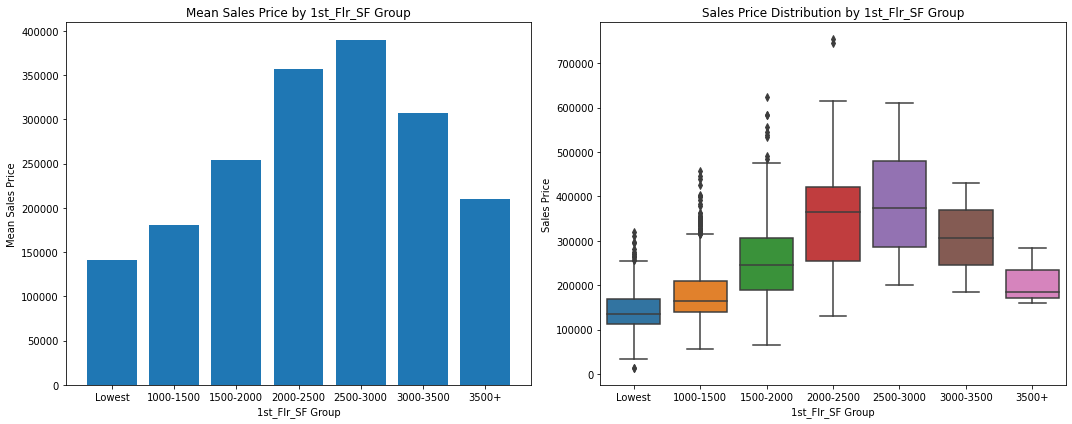

In [85]:
# Define the bin edges for grouping 1st_Flr_SF
bin_edges = [data_final['1st_Flr_SF'].min()-1, 1000, 1500, 2000, 2500, 3000, 3500, float('inf')]
bin_labels = ['Lowest', '1000-1500', '1500-2000', '2000-2500', '2500-3000', '3000-3500', '3500+']

# Create a new column "1st_Flr_SF_Group" with the corresponding area bin labels
data_final['1st_Flr_SF_Group'] = pd.cut(data_final['1st_Flr_SF'], bins=bin_edges, labels=bin_labels)

# Calculate the mean sales price by 1st_Flr_SF group
mean_sales_price_by_1stflrsf_group = data_final.groupby("1st_Flr_SF_Group")["SalePrice"].mean().reset_index().round(2)

# Sort the data by 1st_Flr_SF in ascending order
mean_sales_price_by_1stflrsf_group = mean_sales_price_by_1stflrsf_group.sort_values("1st_Flr_SF_Group")

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot the mean sales price by 1st_Flr_SF group
ax1.bar(mean_sales_price_by_1stflrsf_group["1st_Flr_SF_Group"], mean_sales_price_by_1stflrsf_group["SalePrice"])
ax1.set_xlabel("1st_Flr_SF Group")
ax1.set_ylabel("Mean Sales Price")
ax1.set_title("Mean Sales Price by 1st_Flr_SF Group")

# Create a box plot of Sales Price by 1st_Flr_SF Group
sns.boxplot(x=data_final["1st_Flr_SF_Group"], y=data_final["SalePrice"], ax=ax2)
ax2.set_xlabel("1st_Flr_SF Group")
ax2.set_ylabel("Sales Price")
ax2.set_title("Sales Price Distribution by 1st_Flr_SF Group")

# Adjust the spacing between subplots
fig.tight_layout()

# Calculate the correlation between sales price and 1st_Flr_SF
correlation = data_final['SalePrice'].corr(data_final['1st_Flr_SF'])

# Print the correlation
print("Correlation between Sales Price and 1st_Flr_SF: {:.2f}".format(correlation))

# Show the plots
plt.show()


Correlation between Sales Price and Gr_Liv_Area: 0.71


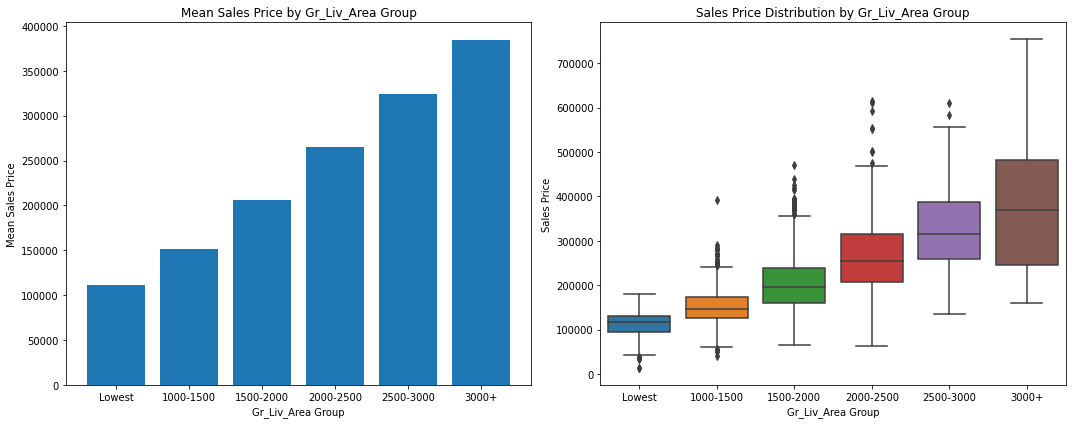

In [86]:
# Define the bin edges for grouping Gr_Liv_Area
bin_edges = [data_final['Gr_Liv_Area'].min()-1, 1000, 1500, 2000, 2500, 3000, float('inf')]
bin_labels = ['Lowest', '1000-1500', '1500-2000', '2000-2500', '2500-3000', '3000+']

# Create a new column "Gr_Liv_Area_Group" with the corresponding area bin labels
data_final['Gr_Liv_Area_Group'] = pd.cut(data_final['Gr_Liv_Area'], bins=bin_edges, labels=bin_labels)

# Calculate the mean sales price by Gr_Liv_Area group
mean_sales_price_by_grlivarea_group = data_final.groupby("Gr_Liv_Area_Group")["SalePrice"].mean().reset_index().round(2)

# Sort the data by Gr_Liv_Area in ascending order
mean_sales_price_by_grlivarea_group = mean_sales_price_by_grlivarea_group.sort_values("Gr_Liv_Area_Group")

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot the mean sales price by Gr_Liv_Area group
ax1.bar(mean_sales_price_by_grlivarea_group["Gr_Liv_Area_Group"], mean_sales_price_by_grlivarea_group["SalePrice"])
ax1.set_xlabel("Gr_Liv_Area Group")
ax1.set_ylabel("Mean Sales Price")
ax1.set_title("Mean Sales Price by Gr_Liv_Area Group")

# Create a box plot of Sales Price by Gr_Liv_Area Group
sns.boxplot(x=data_final["Gr_Liv_Area_Group"], y=data_final["SalePrice"], ax=ax2)
ax2.set_xlabel("Gr_Liv_Area Group")
ax2.set_ylabel("Sales Price")
ax2.set_title("Sales Price Distribution by Gr_Liv_Area Group")

# Adjust the spacing between subplots
fig.tight_layout()

# Calculate the correlation between sales price and Gr_Liv_Area
correlation = data_final['SalePrice'].corr(data_final['Gr_Liv_Area'])

# Print the correlation
print("Correlation between Sales Price and Gr_Liv_Area: {:.2f}".format(correlation))

# Show the plots
plt.show()

Correlation between Sales Price and Total_Bsmt_SF: 0.63


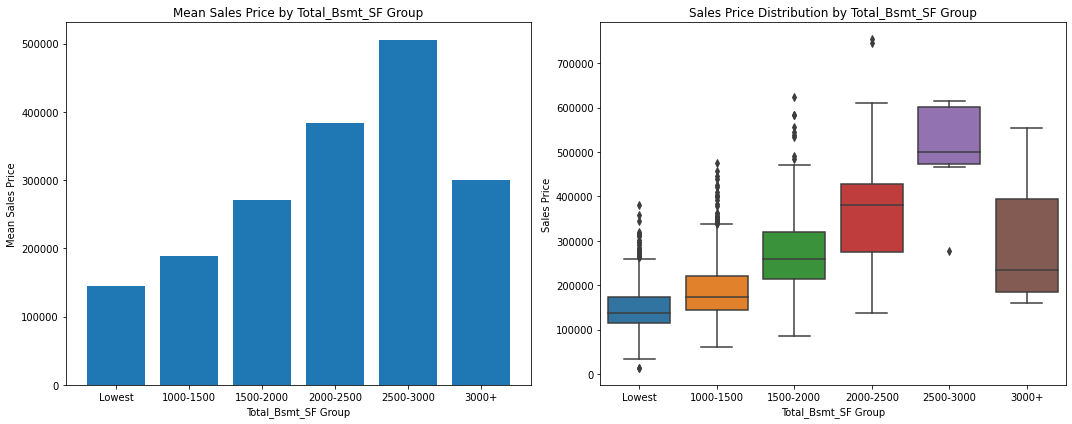

In [87]:
# Define the bin edges for grouping Total_Bsmt_SF
bin_edges = [data_final['Total_Bsmt_SF'].min()-1, 1000, 1500, 2000, 2500, 3000, float('inf')]
bin_labels = ['Lowest', '1000-1500', '1500-2000', '2000-2500', '2500-3000', '3000+']

# Create a new column "Total_Bsmt_SF_Group" with the corresponding area bin labels
data_final['Total_Bsmt_SF_Group'] = pd.cut(data_final['Total_Bsmt_SF'], bins=bin_edges, labels=bin_labels)

# Calculate the mean sales price by Total_Bsmt_SF group
mean_sales_price_by_bsmtsf_group = data_final.groupby("Total_Bsmt_SF_Group")["SalePrice"].mean().reset_index().round(2)

# Sort the data by Total_Bsmt_SF in ascending order
mean_sales_price_by_bsmtsf_group = mean_sales_price_by_bsmtsf_group.sort_values("Total_Bsmt_SF_Group")

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot the mean sales price by Total_Bsmt_SF group
ax1.bar(mean_sales_price_by_bsmtsf_group["Total_Bsmt_SF_Group"], mean_sales_price_by_bsmtsf_group["SalePrice"])
ax1.set_xlabel("Total_Bsmt_SF Group")
ax1.set_ylabel("Mean Sales Price")
ax1.set_title("Mean Sales Price by Total_Bsmt_SF Group")

# Create a box plot of Sales Price by Total_Bsmt_SF Group
sns.boxplot(x=data_final["Total_Bsmt_SF_Group"], y=data_final["SalePrice"], ax=ax2)
ax2.set_xlabel("Total_Bsmt_SF Group")
ax2.set_ylabel("Sales Price")
ax2.set_title("Sales Price Distribution by Total_Bsmt_SF Group")

# Adjust the spacing between subplots
fig.tight_layout()

# Calculate the correlation between sales price and Total_Bsmt_SF
correlation = data_final['SalePrice'].corr(data_final['Total_Bsmt_SF'])

# Print the correlation
print("Correlation between Sales Price and Total_Bsmt_SF: {:.2f}".format(correlation))

# Show the plots
plt.show()


Correlation between Sales Price and Garage Area: 0.64


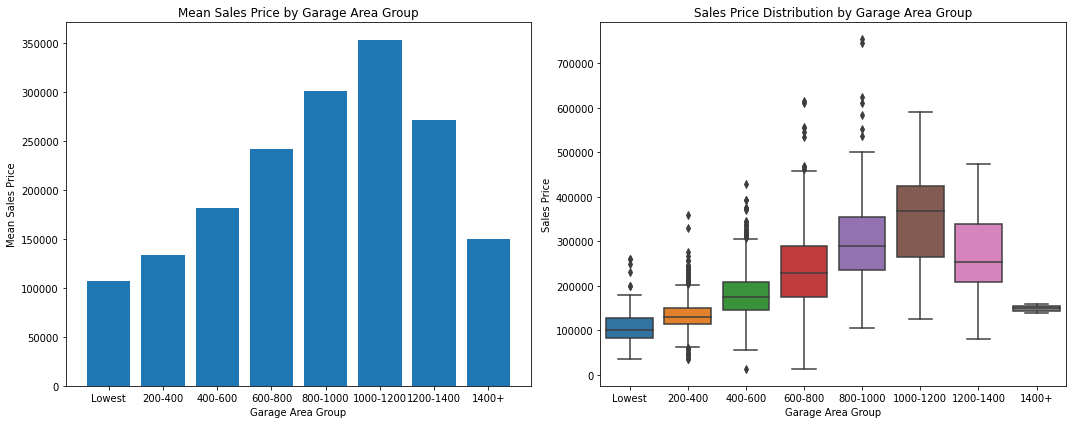

In [88]:
# Define the bin edges for grouping Garage_Area
bin_edges = [data_final['Garage_Area'].min()-1, 200, 400, 600, 800, 1000, 1200, 1400, float('inf')]
bin_labels = ['Lowest', '200-400', '400-600', '600-800', '800-1000', '1000-1200', '1200-1400', '1400+']

# Create a new column "Garage_Area_Group" with the corresponding area bin labels
data_final['Garage_Area_Group'] = pd.cut(data_final['Garage_Area'], bins=bin_edges, labels=bin_labels)

# Calculate the mean sales price by Garage_Area group
mean_sales_price_by_garagearea_group = data_final.groupby("Garage_Area_Group")["SalePrice"].mean().reset_index().round(2)

# Sort the data by Garage_Area in ascending order
mean_sales_price_by_garagearea_group = mean_sales_price_by_garagearea_group.sort_values("Garage_Area_Group")

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot the mean sales price by Garage_Area group
ax1.bar(mean_sales_price_by_garagearea_group["Garage_Area_Group"], mean_sales_price_by_garagearea_group["SalePrice"])
ax1.set_xlabel("Garage Area Group")
ax1.set_ylabel("Mean Sales Price")
ax1.set_title("Mean Sales Price by Garage Area Group")

# Create a box plot of Sales Price by Garage Area Group
sns.boxplot(x=data_final["Garage_Area_Group"], y=data_final["SalePrice"], ax=ax2)
ax2.set_xlabel("Garage Area Group")
ax2.set_ylabel("Sales Price")
ax2.set_title("Sales Price Distribution by Garage Area Group")

# Adjust the spacing between subplots
fig.tight_layout()

# Calculate the correlation between sales price and Garage_Area
correlation = data_final['SalePrice'].corr(data_final['Garage_Area'])

# Print the correlation
print("Correlation between Sales Price and Garage Area: {:.2f}".format(correlation))

# Show the plots
plt.show()

Correlation between Sales Price and Garage Cars: 0.65


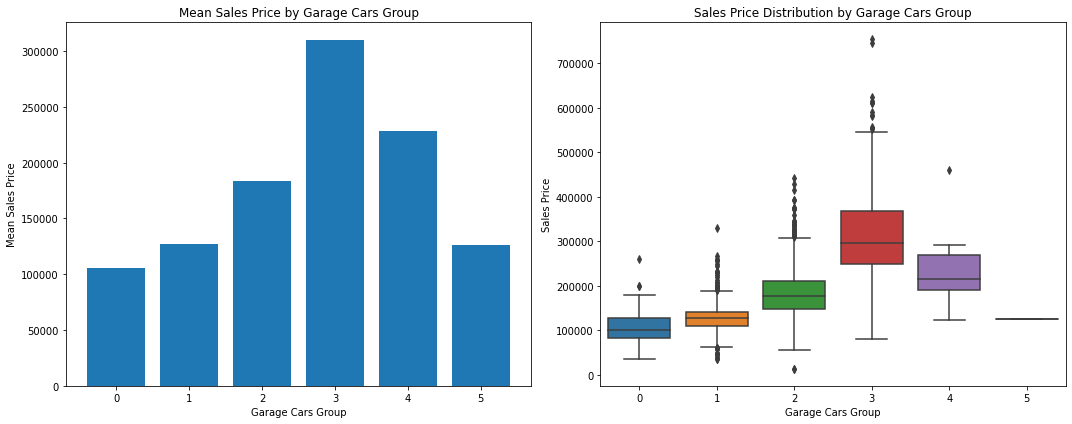

In [89]:
# Define the bin edges for grouping Garage_Cars
bin_edges = [-1, 0, 1, 2, 3, 4, 5]
bin_labels = ['0', '1', '2', '3', '4', '5']

# Create a new column "Garage_Cars_Group" with the corresponding car bin labels
data_final['Garage_Cars_Group'] = pd.cut(data_final['Garage_Cars'], bins=bin_edges, labels=bin_labels)

# Calculate the mean sales price by Garage_Cars group
mean_sales_price_by_garagecars_group = data_final.groupby("Garage_Cars_Group")["SalePrice"].mean().reset_index().round(2)

# Sort the data by Garage_Cars in ascending order
mean_sales_price_by_garagecars_group = mean_sales_price_by_garagecars_group.sort_values("Garage_Cars_Group")

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot the mean sales price by Garage_Cars group
ax1.bar(mean_sales_price_by_garagecars_group["Garage_Cars_Group"], mean_sales_price_by_garagecars_group["SalePrice"])
ax1.set_xlabel("Garage Cars Group")
ax1.set_ylabel("Mean Sales Price")
ax1.set_title("Mean Sales Price by Garage Cars Group")

# Create a box plot of Sales Price by Garage Cars Group
sns.boxplot(x=data_final["Garage_Cars_Group"], y=data_final["SalePrice"], ax=ax2)
ax2.set_xlabel("Garage Cars Group")
ax2.set_ylabel("Sales Price")
ax2.set_title("Sales Price Distribution by Garage Cars Group")

# Adjust the spacing between subplots
fig.tight_layout()

# Calculate the correlation between sales price and Garage_Cars
correlation = data_final['SalePrice'].corr(data_final['Garage_Cars'])

# Print the correlation
print("Correlation between Sales Price and Garage Cars: {:.2f}".format(correlation))

# Show the plots
plt.show()


Correlation between Sales Price and Full Bath: 0.55


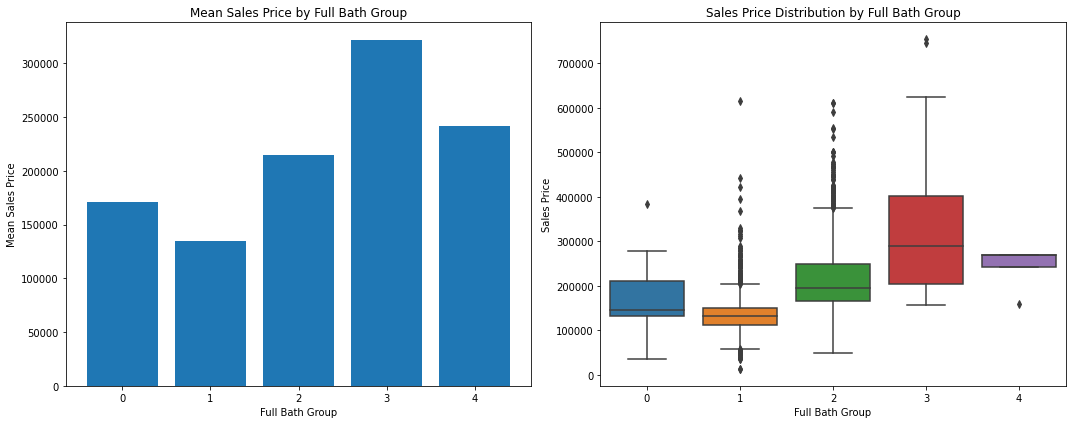

In [90]:
# Define the bin edges for grouping Full_Bath
bin_edges = [-1, 0, 1, 2, 3, 4]
bin_labels = ['0','1', '2', '3', '4']

# Create a new column "Full_Bath_Group" with the corresponding bin labels
data_final['Full_Bath_Group'] = pd.cut(data_final['Full_Bath'], bins=bin_edges, labels=bin_labels)

# Calculate the mean sales price by Full_Bath group
mean_sales_price_by_fullbath_group = data_final.groupby("Full_Bath_Group")["SalePrice"].mean().reset_index().round(2)

# Sort the data by Full_Bath in ascending order
mean_sales_price_by_fullbath_group = mean_sales_price_by_fullbath_group.sort_values("Full_Bath_Group")

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot the mean sales price by Full_Bath group
ax1.bar(mean_sales_price_by_fullbath_group["Full_Bath_Group"], mean_sales_price_by_fullbath_group["SalePrice"])
ax1.set_xlabel("Full Bath Group")
ax1.set_ylabel("Mean Sales Price")
ax1.set_title("Mean Sales Price by Full Bath Group")

# Create a box plot of Sales Price by Full Bath Group
sns.boxplot(x=data_final["Full_Bath_Group"], y=data_final["SalePrice"], ax=ax2)
ax2.set_xlabel("Full Bath Group")
ax2.set_ylabel("Sales Price")
ax2.set_title("Sales Price Distribution by Full Bath Group")

# Adjust the spacing between subplots
fig.tight_layout()

# Calculate the correlation between sales price and Full_Bath
correlation = data_final['SalePrice'].corr(data_final['Full_Bath'])

# Print the correlation
print("Correlation between Sales Price and Full Bath: {:.2f}".format(correlation))

# Show the plots
plt.show()

Correlation between Sales Price and Total Full Bath: 0.59


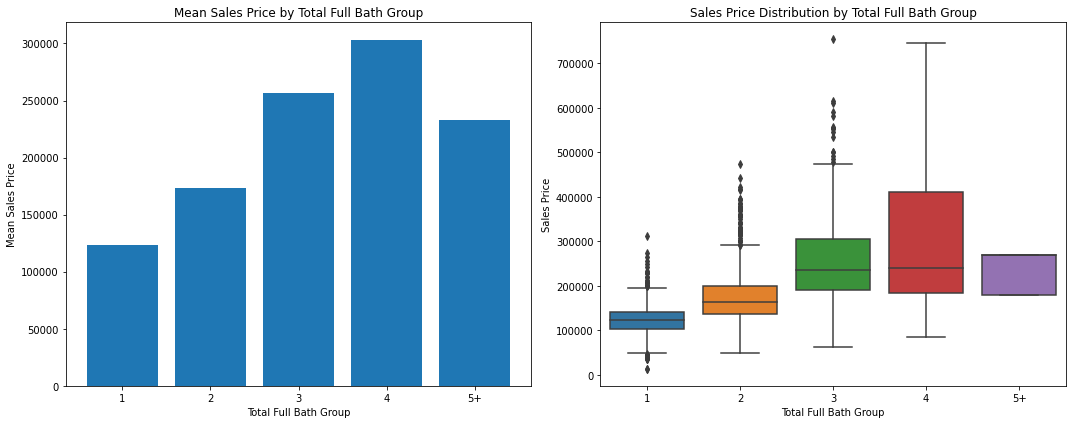

In [91]:
# Calculate the total number of full baths (Full_Bath + Bsmt_Full_Bath)
data_final['Total_Full_Bath'] = data_final['Full_Bath'] + data_final['Bsmt_Full_Bath']

# Define the bin edges for grouping Total_Full_Bath
bin_edges = [data_final['Total_Full_Bath'].min()-1, 1, 2, 3, 4, float('inf')]
bin_labels = ['1', '2', '3', '4', '5+']

# Create a new column "Total_Full_Bath_Group" with the corresponding bin labels
data_final['Total_Full_Bath_Group'] = pd.cut(data_final['Total_Full_Bath'], bins=bin_edges, labels=bin_labels)

# Calculate the mean sales price by Total_Full_Bath group
mean_sales_price_by_total_fullbath_group = data_final.groupby("Total_Full_Bath_Group")["SalePrice"].mean().reset_index().round(2)

# Sort the data by Total_Full_Bath in ascending order
mean_sales_price_by_total_fullbath_group = mean_sales_price_by_total_fullbath_group.sort_values("Total_Full_Bath_Group")

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot the mean sales price by Total_Full_Bath group
ax1.bar(mean_sales_price_by_total_fullbath_group["Total_Full_Bath_Group"], mean_sales_price_by_total_fullbath_group["SalePrice"])
ax1.set_xlabel("Total Full Bath Group")
ax1.set_ylabel("Mean Sales Price")
ax1.set_title("Mean Sales Price by Total Full Bath Group")

# Create a box plot of Sales Price by Total Full Bath Group
sns.boxplot(x=data_final["Total_Full_Bath_Group"], y=data_final["SalePrice"], ax=ax2)
ax2.set_xlabel("Total Full Bath Group")
ax2.set_ylabel("Sales Price")
ax2.set_title("Sales Price Distribution by Total Full Bath Group")

# Adjust the spacing between subplots
fig.tight_layout()

# Calculate the correlation between sales price and Total_Full_Bath
correlation = data_final['SalePrice'].corr(data_final['Total_Full_Bath'])

# Print the correlation
print("Correlation between Sales Price and Total Full Bath: {:.2f}".format(correlation))

# Show the plots
plt.show()


# After transformation

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


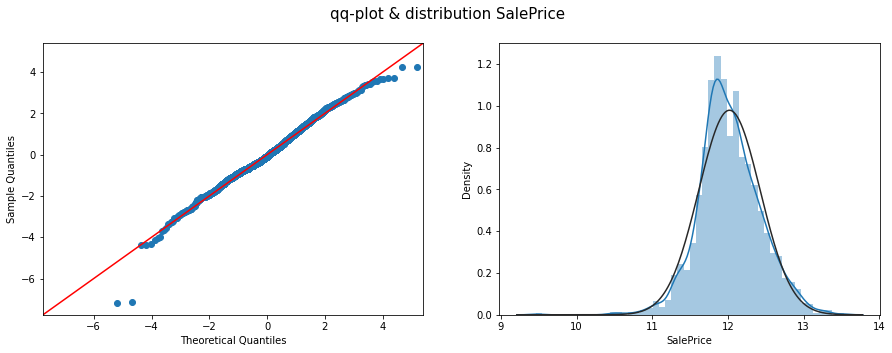

In [92]:
import statsmodels.api as sm
import scipy.stats as stats

# Convert the "SalePrice" variable to a numerical type
data_final["SalePrice"] = data_final["SalePrice"].astype(float)

# Transform the SalePrice variable using np.log1p()
target_log = np.log1p(data_final["SalePrice"])

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle("qq-plot & distribution SalePrice", fontsize=15)

sm.qqplot(target_log, stats.t, distargs=(4,), fit=True, line="45", ax=ax[0])
sns.distplot(target_log, kde=True, hist=True, fit=stats.norm, ax=ax[1])
plt.show()


**Regression Analysis - Does age of house affects sales price?**

In [93]:
# Create a linear regression model
X = data_final["Sold_House_Age"]
y = data_final["SalePrice"]
X = sm.add_constant(X)  # Add a constant term to the predictor variable
model = sm.OLS(y, X)

# Fit the model and obtain the results
results = model.fit()

# Print the summary of the regression analysis
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     1330.
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          2.00e-240
Time:                        08:19:40   Log-Likelihood:                -36683.
No. Observations:                2930   AIC:                         7.337e+04
Df Residuals:                    2928   BIC:                         7.338e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2.345e+05   1914.805    122.

The results of the OLS regression analysis show that the "Sold_House_Age" variable has a significant effect on the "SalePrice" of the houses.

The coefficient for "Sold_House_Age" is -1473.9920, which indicates that, on average, for every unit increase in "Sold_House_Age", the "SalePrice" decreases by approximately $1474. This negative coefficient suggests that as the age of the property at the time of sale increases, the sale price tends to decrease.

The p-value associated with the coefficient is very small (p < 0.001), indicating that the relationship between "Sold_House_Age" and "SalePrice" is statistically significant. This suggests that the observed relationship is unlikely to have occurred by chance.

The R-squared value of 0.312 indicates that the model explains about 31.2% of the variability in the "SalePrice" based on the "Sold_House_Age" variable. This means that the "Sold_House_Age" variable alone is able to explain 31.2% of the variation in "SalePrice".

The Durbin-Watson statistic of 1.009 is close to 2, indicating no significant autocorrelation in the residuals. The Jarque-Bera test has a low p-value (p < 0.001), suggesting that the residuals do not follow a normal distribution.

In summary, the regression analysis suggests that the age of the property at the time of sale, represented by the "Sold_House_Age" variable, has a statistically significant effect on the sale price. However, it's important to note that the model explains only a moderate amount of the variability in "SalePrice", and there may be other factors not considered in the model that also influence the sale price.

In [94]:
# Calculate the mean sales price by neighborhood
mean_sales_price_by_neighborhood = data_final.groupby("Neighborhood")["SalePrice"].mean().reset_index().round(2)

# Print the mean sales price by neighborhood
print("\nMean Sales Price by Neighborhood:")
print(mean_sales_price_by_neighborhood.sort_values("SalePrice", ascending=False))



Mean Sales Price by Neighborhood:
   Neighborhood  SalePrice
18      NoRidge  330319.13
25      StoneBr  324229.20
19      NridgHt  322018.27
10      GrnHill  280000.00
27      Veenker  248314.58
26       Timber  246599.54
24      Somerst  229707.32
4       ClearCr  208662.09
6       Crawfor  207550.83
5       CollgCr  201803.43
0       Blmngtn  196661.68
9        Greens  193531.25
8       Gilbert  190646.58
17       NWAmes  188406.91
23      SawyerW  184070.18
14      Mitchel  162226.63
15        NAmes  145097.35
1       Blueste  143590.00
16      NPkVill  140710.87
12      Landmrk  137000.00
22       Sawyer  136751.15
21        SWISU  135071.94
7       Edwards  130843.38
3       BrkSide  124756.25
20      OldTown  123991.89
2        BrDale  105608.33
11       IDOTRR  103752.90
13      MeadowV   95756.49


In [95]:
# is [SalePrice] trending upwards over the years [YrSold] for the same [MSSubClass]?
# for those not, display the [MSSubClass] value and indicate the year [YrSold] When [SalePrice] trend is reversed

In [96]:
sales_trend = data_final.groupby(['MS_SubClass', 'Yr_Sold'], as_index=False)['SalePrice'].mean()
# dataframe becomes MultiIndex if as_index = True

# Calculate the difference in sale prices compared to the previous year
sales_trend['Difference'] = np.where(sales_trend.MS_SubClass == sales_trend.MS_SubClass.shift(1), sales_trend.SalePrice.diff(), 0)

# Determine the trend based on the difference in sale prices
sales_trend.loc[sales_trend['Difference'] > 0, 'Trend'] = 'Increasing'
sales_trend.loc[sales_trend['Difference'] < 0, 'Trend'] = 'Decreasing'
sales_trend.loc[sales_trend['Difference'] == 0, 'Trend'] = 'NA'

# Filter rows where the trend is reversed (from decreasing to increasing)
trend_reverse = sales_trend.loc[sales_trend["Trend"] == 'Decreasing']
print("List of MS_SubClass and Yr_Sold when trend is reversed: \n\n", trend_reverse)

List of MS_SubClass and Yr_Sold when trend is reversed: 

     MS_SubClass  Yr_Sold      SalePrice    Difference       Trend
2            20     2008  180207.269231  -8775.752046  Decreasing
4            20     2010  187411.968000  -7905.950919  Decreasing
8            30     2009   92225.781250 -11655.253233  Decreasing
9            30     2010   87433.000000  -4792.781250  Decreasing
11           40     2008   79500.000000 -52833.333333  Decreasing
16           45     2008  110125.000000  -4335.000000  Decreasing
17           45     2009   97500.000000 -12625.000000  Decreasing
22           50     2009  134082.777778  -9665.757433  Decreasing
25           60     2007  243798.294118  -9038.887042  Decreasing
26           60     2008  231562.976190 -12235.317927  Decreasing
27           60     2009  231211.350000   -351.626190  Decreasing
28           60     2010  230255.781818   -955.568182  Decreasing
31           70     2008  140935.866667 -37966.933333  Decreasing
35           75  